# Introduction

This notebook is about graphs, matrices and how they relate to each other.


## References

* https://networkx.github.io/documentation/stable/auto_examples/index.html
* https://en.wikipedia.org/wiki/Adjacency_matrix#Adjacency_matrix_of_a_bipartite_graph
* [Dmitry Zinoviev, Complex Network Analysis in Python: Recognize - Construct - Visualize - Analyze - Interpret](https://books.google.com.br/books/about/Complex_Network_Analysis_in_Python.html?id=JafgswEACAAJ&redir_esc=y)
* https://scipy-lectures.org/intro/numpy/array_object.html

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import chain # For flattening the list of edges

# Defining Matrix and Arrays

In [29]:
A = np.array([
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[.1, 0, 0, 0, 0]
])

A

array([[0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0.1, 0. , 0. , 0. , 0. ]])

In [14]:
A_mtx = np.matrix(A)

A_mtx

matrix([[0. , 1. , 0. , 0. , 0. ],
        [0. , 0. , 1. , 0. , 0. ],
        [0. , 0. , 0. , 1. , 0. ],
        [0. , 0. , 0. , 0. , 1. ],
        [0.1, 0. , 0. , 0. , 0. ]])

# Special Matrices

## Reference

* https://en.wikipedia.org/wiki/Laplacian_matrix
* https://en.wikipedia.org/wiki/Adjacency_matrix
* https://en.wikipedia.org/wiki/Degree_matrix
* https://en.wikipedia.org/wiki/Incidence_matrix
* https://en.wikipedia.org/wiki/Distance_matrix
*

## Circulant Matrix

In [32]:
a = np.arange(25).reshape((5, 5))

print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


## Null Matrix

In [18]:
# Creates a list containing 5 lists, each of 8 items, all set to 0
w, h = 8, 5;
Matrix = np.array([[0 for x in range(w)] for y in range(h)] )
print(Matrix)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


# Graphs

## References

* https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)#Undirected_graph
* https://en.wikipedia.org/wiki/Directed_graph
* https://networkx.github.io/documentation/stable/tutorial.html
* https://networkx.github.io/documentation/stable/auto_examples/index.html
* https://stackoverflow.com/questions/35986219/convert-bipartite-graph-to-adjacency-matrix-python

## Defining graphs

In [30]:
G = nx.DiGraph()
edges = chain.from_iterable([(i, j)

for j, column in enumerate(row)
if A[i][j]] for i, row in enumerate(A))
G.add_edges_from(edges)
print(G.edges(data=True))

[(0, 1, {}), (1, 2, {}), (2, 3, {}), (3, 4, {}), (4, 0, {})]


## Defining graphs with weights

In [16]:
G = nx.DiGraph()
edges = chain.from_iterable([(i, j, {"weight": A[i][j]})
for j, column in enumerate(row)
if A[i][j]] for i, row in enumerate(A))
G.add_edges_from(edges)
print(G.edges(data=True))

[(0, 1, {'weight': 1.0}), (1, 2, {'weight': 1.0}), (2, 3, {'weight': 1.0}), (3, 4, {'weight': 1.0}), (4, 0, {'weight': 0.1})]


## Defining matrix from edges

In [41]:
n=5
edge_u = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4]
edge_v = [1, 3, 4, 0, 2, 3, 4, 1, 3, 0, 1, 2, 4, 0, 1, 3]

A = [[0 for i in range(n)] for k in range(n)]

for i in range(len(edge_u)):
    u = edge_u[i]
    v = edge_v[i]
    A[u][v] = 1
    print(u,v)

0 1
0 3
0 4
1 0
1 2
1 3
1 4
2 1
2 3
3 0
3 1
3 2
3 4
4 0
4 1
4 3


In [42]:
A

[[0, 1, 0, 1, 1],
 [1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1],
 [1, 1, 0, 1, 0]]

In [24]:
for i in range(5):
        for k in range(5):
            print(A[i][k],"",end="")
        print('')

0 1 0 1 1 
1 0 1 1 1 
0 1 0 1 0 
1 1 1 0 1 
1 1 0 1 0 


In [25]:
a = ['p1','p2','p3','p4','p5','p6']
b = ['c1','c2','c3']

## Drawing graphs and grids

(0, 0) (1, 0) (0, 1)
(0, 1) (1, 1) (0, 2)
(0, 2) (1, 2) (0, 3)
(0, 3) (1, 3) (0, 4)
(0, 4) (1, 4)
(1, 0) (2, 0) (1, 1)
(1, 1) (2, 1) (1, 2)
(1, 2) (2, 2) (1, 3)
(1, 3) (2, 3) (1, 4)
(1, 4) (2, 4)
(2, 0) (3, 0) (2, 1)
(2, 1) (3, 1) (2, 2)
(2, 2) (3, 2) (2, 3)
(2, 3) (3, 3) (2, 4)
(2, 4) (3, 4)
(3, 0) (4, 0) (3, 1)
(3, 1) (4, 1) (3, 2)
(3, 2) (4, 2) (3, 3)
(3, 3) (4, 3) (3, 4)
(3, 4) (4, 4)
(4, 0) (4, 1)
(4, 1) (4, 2)
(4, 2) (4, 3)
(4, 3) (4, 4)
(4, 4)


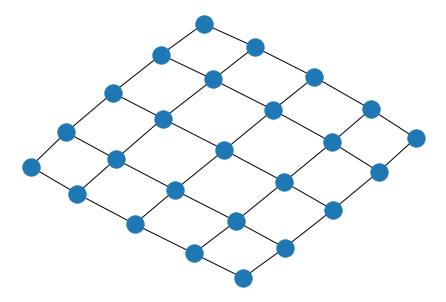

In [60]:
G = nx.grid_2d_graph(5, 5)  # 5x5 grid

# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")

# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)

nx.draw(H)

plt.show()

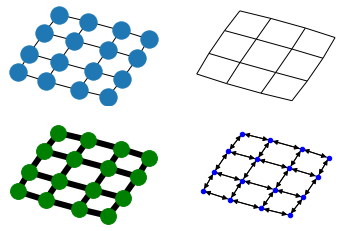

In [28]:
G = nx.grid_2d_graph(4, 4)  # 4x4 grid

pos = nx.spring_layout(G, iterations=100)

plt.subplot(221)
nx.draw(G, pos, font_size=8)

plt.subplot(222)
nx.draw(G, pos, node_color='k', node_size=0, with_labels=False)

plt.subplot(223)
nx.draw(G, pos, node_color='g', node_size=250, with_labels=False, width=6)

plt.subplot(224)
H = G.to_directed()
nx.draw(H, pos, node_color='b', node_size=20, with_labels=False)

plt.show()

# Example using networkx: bipartite graph to adjacency matrix

## References

* https://en.wikipedia.org/wiki/Adjacency_matrix#Adjacency_matrix_of_a_bipartite_graph
* https://networkx.github.io/documentation/stable/auto_examples/index.html

## Bipartite graph

In [3]:
from operator import itemgetter
import networkx as nx
from networkx.algorithms.bipartite import biadjacency_matrix

def to_adjacency_matrix(data):
    g = nx.DiGraph()
    g.add_edges_from(data)
    partition_1 = set(map(itemgetter(0), data))
    return biadjacency_matrix(g, partition_1).toarray()

In [12]:
data = [('a', 'developer'),
         ('b', 'tester'),
        ('b', 'developer'),
         ('c','developer'),
         ('c', 'architect')]

data

[('a', 'developer'),
 ('b', 'tester'),
 ('b', 'developer'),
 ('c', 'developer'),
 ('c', 'architect')]

In [13]:
to_adjacency_matrix(data)

array([[0, 1, 0],
       [1, 1, 0],
       [0, 1, 1]], dtype=int32)